![Logo](https://raw.githubusercontent.com/onursercanyilmaz/recommendedreads/main/images/recommendedreads_rectangle.png?token=GHSAT0AAAAAAB75L5AIJN35ELPMSG6AVDKSZBUBW7Q)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import collections
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
from collections import Counter
import string
import re

/kaggle/input/0-recommended-reads/__results__.html
/kaggle/input/0-recommended-reads/tokenizeddata.csv
/kaggle/input/0-recommended-reads/__notebook__.ipynb
/kaggle/input/0-recommended-reads/__output__.json
/kaggle/input/0-recommended-reads/custom.css


In [2]:
df = pd.read_csv('../input/0-recommended-reads/tokenizeddata.csv')
df

,booktitle,originalbooktitle,authorname,editionlanguage,ratingscore,ratingvotes,reviewnumber,bookdescription,yearpublished,genres,url,type,untokenizeddata,tokenizeddata
0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,2011,"{'Young Adult': 3439, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/12578077-o...,aliens,Obsidian Jennifer L. Armentrout Starting over ...,"['obsidian', 'jennifer', 'l', 'armentrout', 's..."
1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,2012,"{'Young Adult': 2271, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13047090-onyx,aliens,Onyx Jennifer L. Armentrout BEING CONNECTED TO...,"['onyx', 'jennifer', 'l', 'armentrout', 'conne..."
2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",2013,"{'Young Adult': 5436, 'Science Fiction': 3327,...",https://www.goodreads.com/book/show/16101128-t...,aliens,"The 5th Wave Rick Yancey After the 1st wave, o...","['th', 'wave', 'rick', 'yancey', 'st', 'wave',..."
3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,2008,"{'Young Adult': 4529, 'Science Fiction': 4285,...",https://www.goodreads.com/book/show/1656001.Th...,aliens,The Host Stephenie Meyer Melanie Stryder refus...,"['host', 'stephenie', 'meyer', 'melanie', 'str..."
4,Opal,Opal,Jennifer L. Armentrout,None,4.27,129006,9463,No one is like Daemon Black.When he set out to...,2012,"{'Young Adult': 1855, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13362536-opal,aliens,Opal Jennifer L. Armentrout No one is like Dae...,"['opal', 'jennifer', 'l', 'armentrout', 'one',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14898,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",2000,"{'Romance': 28, 'Science Fiction (Time Travel)...",https://www.goodreads.com/book/show/1888734.Tu...,time travel,Tumbling Through Time Gwyn Cready In her spark...,"['tumbling', 'time', 'gwyn', 'cready', 'sparkl..."
14899,Time's Arrow,Time’s Arrow,Martin Amis,English,3.71,14934,1106,In Time's Arrow the doctor Tod T. Friendly die...,1991,"{'Fiction': 586, 'Historical (Historical Ficti...",https://www.goodreads.com/book/show/23031.Time...,time travel,Time's Arrow Martin Amis In Time's Arrow the d...,"['times', 'arrow', 'martin', 'amis', 'times', ..."
14900,Time Out of Joint,Time Out of Joint,Philip K. Dick,English,3.85,11126,688,Time Out of Joint is Philip K. Dick’s classic ...,1959,"{'Science Fiction': 532, 'Fiction': 211, 'Nove...",https://www.goodreads.com/book/show/698034.Tim...,time travel,Time Out of Joint Philip K. Dick Time Out of J...,"['time', 'joint', 'philip', 'k', 'dick', 'time..."
14901,Fog Magic,Fog Magic,Julia L. Sauer,English,3.88,1204,170,"Originally published in 1943, this edition fea...",1943,"{'Fantasy': 73, 'Fiction': 31, 'Childrens': 31...",https://www.goodreads.com/book/show/297891.Fog...,time travel,Fog Magic Julia L. Sauer Originally published ...,"['fog', 'magic', 'julia', 'l', 'sauer', 'origi..."


In [3]:
def calculateZipf(tokens):
    freq = collections.Counter(tokens)

# Sort the tokens by frequency
    sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

    # Plot the frequency distribution on a log-log scale
    ranks = range(1, len(sorted_freq) + 1)
    frequencies = [f for _, f in sorted_freq]
    return ranks, frequencies

In [4]:
df['zipfrankfreq'] = df['tokenizeddata'].apply(lambda x: calculateZipf(x))
df

,booktitle,originalbooktitle,authorname,editionlanguage,ratingscore,ratingvotes,reviewnumber,bookdescription,yearpublished,genres,url,type,untokenizeddata,tokenizeddata,zipfrankfreq
0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,2011,"{'Young Adult': 3439, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/12578077-o...,aliens,Obsidian Jennifer L. Armentrout Starting over ...,"['obsidian', 'jennifer', 'l', 'armentrout', 's...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,2012,"{'Young Adult': 2271, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13047090-onyx,aliens,Onyx Jennifer L. Armentrout BEING CONNECTED TO...,"['onyx', 'jennifer', 'l', 'armentrout', 'conne...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",2013,"{'Young Adult': 5436, 'Science Fiction': 3327,...",https://www.goodreads.com/book/show/16101128-t...,aliens,"The 5th Wave Rick Yancey After the 1st wave, o...","['th', 'wave', 'rick', 'yancey', 'st', 'wave',...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,2008,"{'Young Adult': 4529, 'Science Fiction': 4285,...",https://www.goodreads.com/book/show/1656001.Th...,aliens,The Host Stephenie Meyer Melanie Stryder refus...,"['host', 'stephenie', 'meyer', 'melanie', 'str...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
4,Opal,Opal,Jennifer L. Armentrout,None,4.27,129006,9463,No one is like Daemon Black.When he set out to...,2012,"{'Young Adult': 1855, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13362536-opal,aliens,Opal Jennifer L. Armentrout No one is like Dae...,"['opal', 'jennifer', 'l', 'armentrout', 'one',...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14898,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",2000,"{'Romance': 28, 'Science Fiction (Time Travel)...",https://www.goodreads.com/book/show/1888734.Tu...,time travel,Tumbling Through Time Gwyn Cready In her spark...,"['tumbling', 'time', 'gwyn', 'cready', 'sparkl...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
14899,Time's Arrow,Time’s Arrow,Martin Amis,English,3.71,14934,1106,In Time's Arrow the doctor Tod T. Friendly die...,1991,"{'Fiction': 586, 'Historical (Historical Ficti...",https://www.goodreads.com/book/show/23031.Time...,time travel,Time's Arrow Martin Amis In Time's Arrow the d...,"['times', 'arrow', 'martin', 'amis', 'times', ...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
14900,Time Out of Joint,Time Out of Joint,Philip K. Dick,English,3.85,11126,688,Time Out of Joint is Philip K. Dick’s classic ...,1959,"{'Science Fiction': 532, 'Fiction': 211, 'Nove...",https://www.goodreads.com/book/show/698034.Tim...,time travel,Time Out of Joint Philip K. Dick Time Out of J...,"['time', 'joint', 'philip', 'k', 'dick', 'time...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
14901,Fog Magic,Fog Magic,Julia L. Sauer,English,3.88,1204,170,"Originally published in 1943, this edition fea...",1943,"{'Fantasy': 73, 'Fiction': 31, 'Childrens': 31...",https://www.goodreads.com/book/show/297891.Fog...,time travel,Fog Magic Julia L. Sauer Originally published ...,"['fog', 'magic', 'julia', 'l', 'sauer', 'origi...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."


In [5]:
df['zipfrankfreq'][500][0]

range(1, 29)

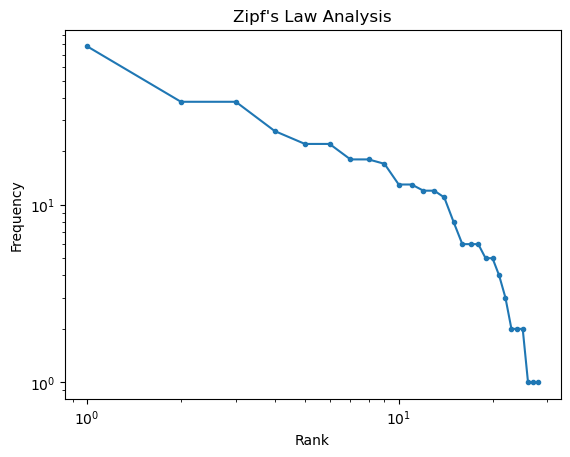

In [6]:
plt.loglog(df['zipfrankfreq'][500][0], df['zipfrankfreq'][500][1], marker='.')
plt.title("Zipf's Law Analysis")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['tokenizeddata'] = df['tokenizeddata'].apply(lambda x: eval(x))

In [8]:
df['tokenizeddata'][0]

['obsidian',
 'jennifer',
 'l',
 'armentrout',
 'starting',
 'suckswhen',
 'moved',
 'west',
 'virginia',
 'right',
 'senior',
 'year',
 '’',
 'pretty',
 'much',
 'resigned',
 'thick',
 'accents',
 'dodgy',
 'internet',
 'access',
 'whole',
 'lot',
 'boring…',
 'spotted',
 'hot',
 'neighbor',
 'looming',
 'height',
 'eerie',
 'green',
 'eyes',
 'things',
 'looking',
 'upand',
 'opened',
 'mouthdaemon',
 'infuriating',
 'arrogant',
 'stabworthy',
 'get',
 'along',
 'stranger',
 'attacks',
 'daemon',
 'literally',
 'freezes',
 'time',
 'wave',
 'hand',
 'well',
 'something…',
 'unexpected',
 'happens',
 'hot',
 'alien',
 'living',
 'next',
 'door',
 'marks',
 'meyou',
 'heard',
 'alien',
 'turns',
 'daemon',
 'sister',
 'galaxy',
 'enemies',
 'wanting',
 'steal',
 'abilities',
 'daemon',
 '’',
 'touch',
 'lit',
 'like',
 'vegas',
 'strip',
 'way',
 '’',
 'getting',
 'alive',
 'sticking',
 'close',
 'daemon',
 'alien',
 'mojo',
 'fades',
 '’',
 'kill',
 'first',
 'young',
 'adult',
 'fant

In [9]:
table = str.maketrans("", "", string.punctuation)

clean_tokens = [token.translate(table) for token in df['tokenizeddata'][0]]

print(clean_tokens)

['obsidian', 'jennifer', 'l', 'armentrout', 'starting', 'suckswhen', 'moved', 'west', 'virginia', 'right', 'senior', 'year', '’', 'pretty', 'much', 'resigned', 'thick', 'accents', 'dodgy', 'internet', 'access', 'whole', 'lot', 'boring…', 'spotted', 'hot', 'neighbor', 'looming', 'height', 'eerie', 'green', 'eyes', 'things', 'looking', 'upand', 'opened', 'mouthdaemon', 'infuriating', 'arrogant', 'stabworthy', 'get', 'along', 'stranger', 'attacks', 'daemon', 'literally', 'freezes', 'time', 'wave', 'hand', 'well', 'something…', 'unexpected', 'happens', 'hot', 'alien', 'living', 'next', 'door', 'marks', 'meyou', 'heard', 'alien', 'turns', 'daemon', 'sister', 'galaxy', 'enemies', 'wanting', 'steal', 'abilities', 'daemon', '’', 'touch', 'lit', 'like', 'vegas', 'strip', 'way', '’', 'getting', 'alive', 'sticking', 'close', 'daemon', 'alien', 'mojo', 'fades', '’', 'kill', 'first', 'young', 'adult', 'fantasy', 'paranormal', 'fantasy', 'romance', 'science', 'fiction', 'aliens', 'science', 'fiction

In [10]:
#TODO enemies - enemy, remove boring... or '''